# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Dataset

In [2]:
df=pd.read_excel("C:/Users/User/Desktop/Machine learning Project/Maketing Analysis/8.Retail Marketing Analytics Projects/Response Modeling for Supermarket/marketing_campaign.xlsx")

In [3]:
df.shape

(2240, 29)

In [4]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


# Setting Display Options

In [5]:
pd.set_option('display.max_columns',None)

# Warning Sppression

In [6]:
import warnings
warnings.filterwarnings('ignore')

# Drop ID Feature from Dataset

In [7]:
df=df.drop(['ID'],axis=1)

# Defining Target and Independent Variables

In [8]:
Y=df[['Response']]
X=df.drop(['Response'],axis=1)

# Response Rate

In [9]:
Y.mean()

Response    0.149107
dtype: float64

# Build Derived Features -Customer Age and Tenure

In [10]:
import datetime
reference_date=datetime.datetime(2022,1,1)
print(reference_date)

2022-01-01 00:00:00


In [11]:
X['Year_Birth']=pd.to_datetime(df['Year_Birth'],format='%Y')
X['Age']=(reference_date - X['Year_Birth']).astype('timedelta64[Y]')

X['Dt_Customer']=pd.to_datetime(X['Dt_Customer'])
X['Cust_Tenure']= (reference_date - X['Dt_Customer']).astype('timedelta64[Y]')

X=X.drop(['Year_Birth','Dt_Customer'],axis=1)

In [12]:
X[['Age','Cust_Tenure']].head()

,Age,Cust_Tenure
0,65.0,9.0
1,68.0,7.0
2,57.0,8.0
3,38.0,7.0
4,41.0,7.0


# Split features into Numerical and Categorical 

In [13]:
num=X.select_dtypes(include='number')
char=X.select_dtypes(include='object')

In [14]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))

In [15]:
df_value_counts.columns=['feature_levels']
df_value_counts.head()

,feature_levels
Income,1974
Kidhome,3
Teenhome,3
Recency,100
MntWines,776


In [16]:
slice=df_value_counts.loc[df_value_counts['feature_levels']<=20]
cat_list=slice.index
cat=num.loc[:,cat_list]
cat.dtypes

Kidhome                  int64
Teenhome                 int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Cust_Tenure            float64
dtype: object

In [17]:
def data_converter(x):
    x=x.astype('object')
    return(x)
cat=cat.apply(lambda x : data_converter(x))
cat.dtypes

Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [18]:
slice1=df_value_counts.loc[df_value_counts['feature_levels']>20]
num_list=slice1.index
num=num.loc[:,num_list]

In [19]:
char=pd.concat([char,cat],axis=1,join='inner')

In [20]:
print("The shape of numerical dataframe :",num.shape)
print("The shape of categorical dataframe :",char.shape)

The shape of numerical dataframe : (2240, 9)
The shape of categorical dataframe : (2240, 18)


# Outlier Analysis of Numerical Features

In [21]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,53.178125
std,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,12.008965
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000
1%,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,34.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,38.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,45.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,52.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,63.000000


# Capping and Flooring of outliers

In [22]:
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [23]:
num=num.apply(lambda x : outlier_cap(x))

In [24]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.90,0.99])

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Age
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51770.277076,49.101786,302.909821,26.158482,165.075446,37.351366,26.873688,43.770089,53.118750
std,20728.704775,28.949501,333.316827,39.208270,216.547373,53.985910,40.484302,51.118104,11.689759
min,7579.200000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
1%,7646.520000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,30.000000
5%,18985.500000,4.000000,3.000000,0.000000,4.000000,0.000000,0.000000,1.000000,34.000000
10%,24117.500000,9.000000,6.000000,0.000000,7.000000,0.000000,0.000000,3.000000,38.000000
25%,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,45.000000
50%,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,52.000000
75%,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,63.000000


# Missing Value -Numerical Features

In [25]:
num.isnull().mean()

Income              0.010714
Recency             0.000000
MntWines            0.000000
MntFruits           0.000000
MntMeatProducts     0.000000
MntFishProducts     0.000000
MntSweetProducts    0.000000
MntGoldProds        0.000000
Age                 0.000000
dtype: float64

# Missing Value Handling -Numerical Features(Imputation)

In [26]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

In [27]:
num_1.isnull().mean()

Income              0.0
Recency             0.0
MntWines            0.0
MntFruits           0.0
MntMeatProducts     0.0
MntFishProducts     0.0
MntSweetProducts    0.0
MntGoldProds        0.0
Age                 0.0
dtype: float64

# Missing Value Handling-Categorical Features

In [28]:
char.isnull().mean()

Education              0.0
Marital_Status         0.0
Kidhome                0.0
Teenhome               0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Cust_Tenure            0.0
dtype: float64

# Feature Selection -Numerical Features

# Step-1: Remove Features with 0 variance

In [29]:
from sklearn.feature_selection import VarianceThreshold

varselector=VarianceThreshold(threshold=0)
varselector.fit_transform(num_1)
#Get the columns to keep and create new dataframe with those only
cols=varselector.get_support(indices=True)
num_2=num_1.iloc[:,cols]

In [30]:
num_2.iloc[0]

Income              58138.0
Recency                58.0
MntWines              635.0
MntFruits              88.0
MntMeatProducts       546.0
MntFishProducts       172.0
MntSweetProducts       88.0
MntGoldProds           88.0
Age                    65.0
Name: 0, dtype: float64

# Step-2 :Bi-variate Analysis(Feature Discretization)

In [31]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num_2),index=num_2.index,columns=num_2.columns).add_suffix('_Rank')
num_binned.head()

,Income_Rank,Recency_Rank,MntWines_Rank,MntFruits_Rank,MntMeatProducts_Rank,MntFishProducts_Rank,MntSweetProducts_Rank,MntGoldProds_Rank,Age_Rank
0,5.0,5.0,8.0,8.0,9.0,8.0,7.0,8.0,8.0
1,4.0,3.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0
2,7.0,2.0,7.0,7.0,6.0,7.0,5.0,6.0,6.0
3,1.0,2.0,1.0,3.0,3.0,3.0,2.0,1.0,1.0
4,6.0,9.0,4.0,6.0,6.0,6.0,6.0,3.0,1.0


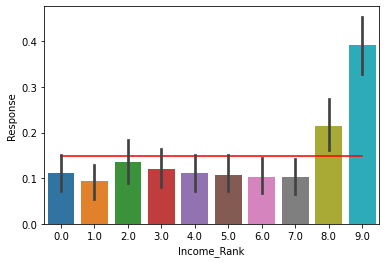

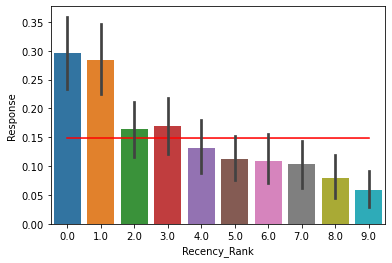

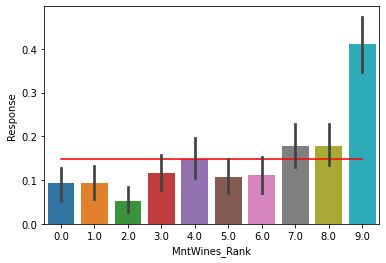

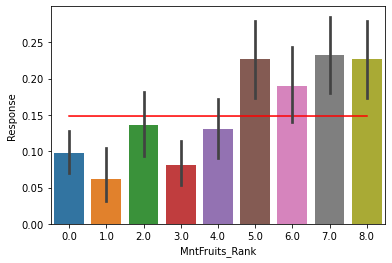

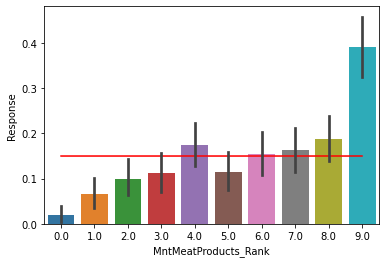

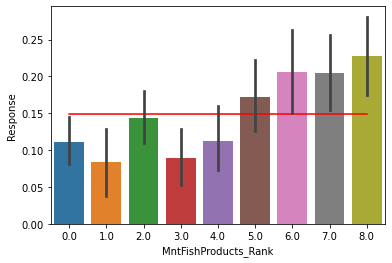

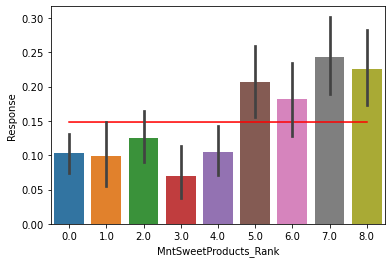

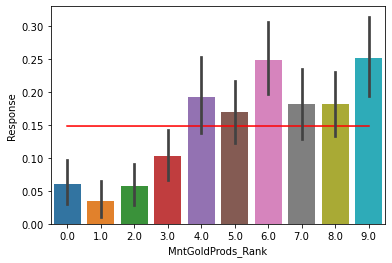

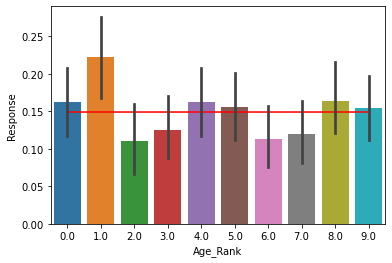

In [32]:
X_bin_combined=pd.concat([Y,num_binned],axis=1,join='inner')

from numpy import mean
for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['Response'].mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col,y='Response',data=X_bin_combined,estimator=mean)
plt.show()

In [33]:
num_droplist=['Age']
num_2=num_2.drop(num_droplist,axis=1)
num_2.shape

(2240, 8)

# Part-3: Select K Best

In [34]:
from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest(chi2,k=6)
selector.fit_transform(num_2,Y)
#Get the columns to keep and create dataframe with those only
cols=selector.get_support(indices=True)
select_feature_df_num=num_1.iloc[:,cols]


In [35]:
select_feature_df_num.iloc[0]

Income             58138.0
MntWines             635.0
MntFruits             88.0
MntMeatProducts      546.0
MntFishProducts      172.0
MntGoldProds          88.0
Name: 0, dtype: float64

# Feature Selection -Categorical Features

In [36]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Z_CostContact          object
Z_Revenue              object
Cust_Tenure            object
dtype: object

In [37]:
def unique_levels(x):
    x=x.value_counts().count()
    return(x)
char_unique_levels=pd.DataFrame(char.apply(lambda x : unique_levels(x)))

In [38]:
char_unique_levels

,0
Education,5
Marital_Status,8
Kidhome,3
Teenhome,3
NumDealsPurchases,15
NumWebPurchases,15
NumCatalogPurchases,14
NumStorePurchases,14
NumWebVisitsMonth,16
AcceptedCmp3,2


In [39]:
char_unique_levels.columns=['feature_levels']
slice1=char_unique_levels.loc[char_unique_levels['feature_levels']>1]
cat_list=slice1.index
char=char.loc[:,cat_list]

In [40]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Cust_Tenure            object
dtype: object

# Step-1 Bivariate Analysis

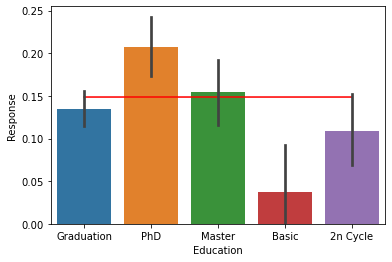

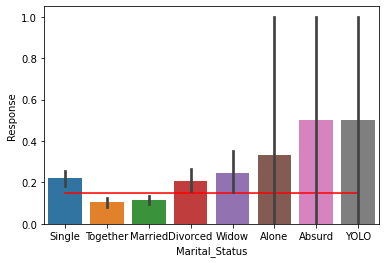

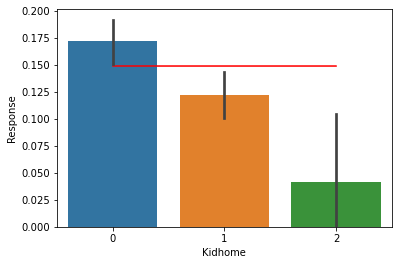

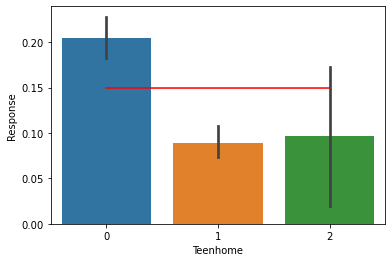

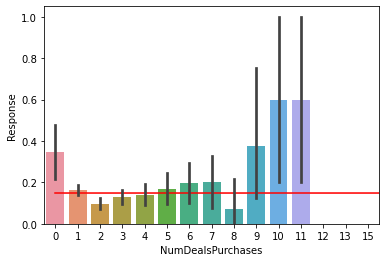

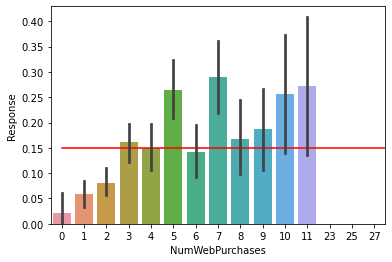

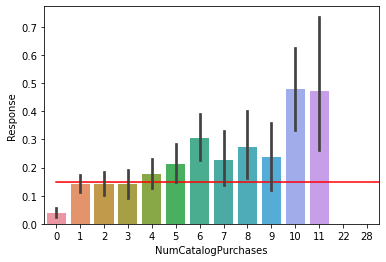

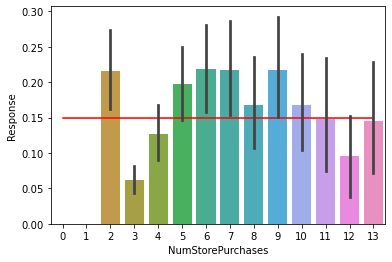

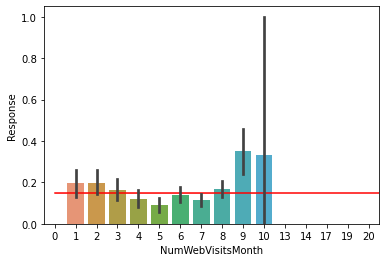

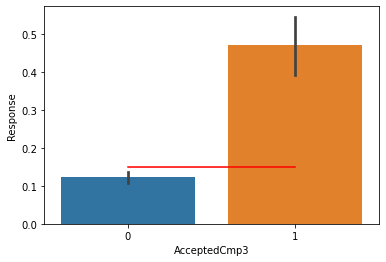

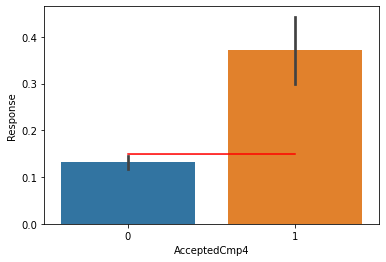

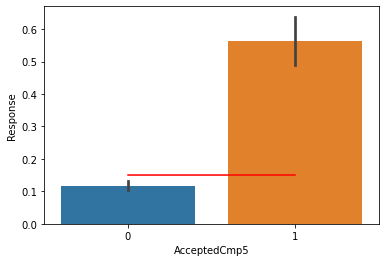

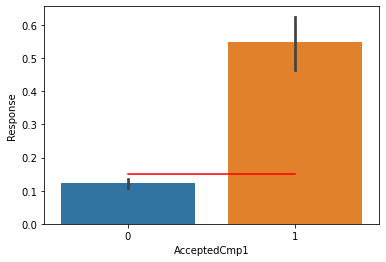

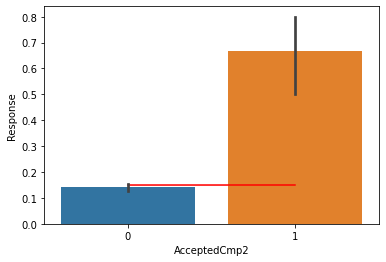

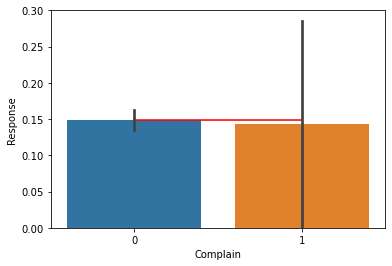

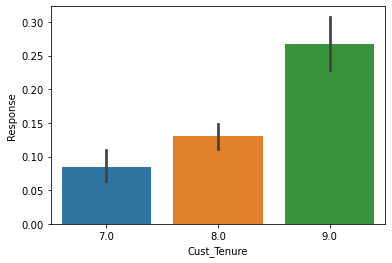

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

for col in (char.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_char_merged['Response'].mean(),data=X_char_merged,color='red')
    sns.barplot(x=col,y='Response',data=X_char_merged,estimator= mean)
plt.show()

In [42]:
char.dtypes

Education              object
Marital_Status         object
Kidhome                object
Teenhome               object
NumDealsPurchases      object
NumWebPurchases        object
NumCatalogPurchases    object
NumStorePurchases      object
NumWebVisitsMonth      object
AcceptedCmp3           object
AcceptedCmp4           object
AcceptedCmp5           object
AcceptedCmp1           object
AcceptedCmp2           object
Complain               object
Cust_Tenure            object
dtype: object

In [43]:
char_droplist=['Education','NumStorePurchases','Complain']
char=char.drop(char_droplist,axis=1)
char.shape

(2240, 13)

# Create dummies features with n-1 levels(One-Hot Encoding)

In [44]:
X_char_dum=pd.get_dummies(char,drop_first=True)
X_char_dum.shape

(2240, 74)

# Step-2 Select K Best

In [45]:
from sklearn.feature_selection import SelectKBest,chi2
selector=SelectKBest(chi2,k=70)
selector.fit_transform(X_char_dum,Y)
#Get columns to keep and create new dataframe with those only
cols=selector.get_support(indices=True)
select_features_df_char=X_char_dum.iloc[:,cols]

In [46]:
select_features_df_char.dtypes

Marital_Status_Alone       uint8
Marital_Status_Divorced    uint8
Marital_Status_Married     uint8
Marital_Status_Single      uint8
Marital_Status_Together    uint8
                           ...  
AcceptedCmp5_1             uint8
AcceptedCmp1_1             uint8
AcceptedCmp2_1             uint8
Cust_Tenure_8.0            uint8
Cust_Tenure_9.0            uint8
Length: 70, dtype: object

# Merging the Numerical and Categorical Dataset for Model Development

In [47]:
X_all=pd.concat([select_features_df_char,select_feature_df_num],axis=1,join='inner')

# Dimensionality Reduction through Variable Clustering

In [48]:
from varclushi import VarClusHi
vc=VarClusHi(X_all,maxeigval2=1,maxclus=None)
vc.varclus()

In [49]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,8,4.016371,0.961196,0.502046
1,1,4,1.635838,0.979786,0.408960
2,2,4,1.832339,0.887457,0.458085
3,3,3,1.574043,0.993763,0.524681
4,4,2,1.533925,0.466075,0.766963
5,5,2,1.200920,0.799080,0.600460
6,6,3,1.415532,0.998584,0.471844
7,7,2,1.030270,0.969730,0.515135
8,8,3,1.201906,0.958295,0.400635
9,9,4,1.065564,0.993028,0.266391


In [50]:
check=vc.rsquare
check

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Kidhome_1,0.438819,0.076622,0.607749
1,0,Income,0.736300,0.168487,0.317133
2,0,MntWines,0.593854,0.274441,0.559769
3,0,MntFruits,0.540704,0.079952,0.499209
4,0,MntMeatProducts,0.691833,0.156511,0.365347
...,...,...,...,...,...
71,30,NumWebPurchases_25,1.000000,0.002089,0.000000
72,31,NumWebVisitsMonth_17,1.000000,0.001375,0.000000
73,32,NumDealsPurchases_13,1.000000,0.001330,0.000000
74,33,NumDealsPurchases_12,1.000000,0.005236,0.000000


In [51]:
filter=check[check['RS_Ratio']<=0.5]
filter.shape

(45, 5)

In [52]:
final_features=filter['Variable']
X_all=X_all[final_features]
X_all.shape

(2240, 45)

# Train Test Split

In [67]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_all,Y,test_size=0.2,random_state=50)

In [68]:
print("Shape of the training data",X_train.shape)
print("Shape of testing data",X_test.shape)
print("Response Rate in Training Data",y_train.mean())
print("Response Rate in Testing Data",y_test.mean())

Shape of the training data (1792, 45)
Shape of testing data (448, 45)
Response Rate in Training Data Response    0.149554
dtype: float64
Response Rate in Testing Data Response    0.147321
dtype: float64


# Building Logistic Regression Model

In [80]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(random_state=50)
logreg.fit(X_train,y_train)

LogisticRegression(random_state=50)

# Building Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=50)

# Grid Search Model for Model Optimization

In [82]:
from sklearn.model_selection import GridSearchCV
param_dist= {'max_depth':[3,5,6,7],'min_samples_split':[75,100,125,150]}
tree_grid= GridSearchCV(dtree, cv=10, param_grid=param_dist, n_jobs=3)
tree_grid.fit(X_train,y_train)
print("Best Parameters using Grid Search : \n",tree_grid.best_params_)

Best Parameters using Grid Search : 
 {'max_depth': 3, 'min_samples_split': 75}


In [83]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=50,max_depth=3,min_samples_split=75)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=75, random_state=50)

# Building Random Forest Model

In [89]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=50,max_depth=3,min_samples_split=75)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, min_samples_split=75, random_state=50)

# Building Gradient Boosting Model

In [87]:
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=50,max_depth=3,min_samples_split=75)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', min_samples_split=75,
                           random_state=50)

# Model Evaluation

In [88]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [90]:
y_pred_logreg=logreg.predict(X_test)
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [97]:
print("Accuracy from Logistic Regression Model",metrics.accuracy_score(y_test,y_pred_logreg))
print("Precision from Logistic Regression Model",metrics.precision_score(y_test,y_pred_logreg))
print("Recall from Logistic Regression Model",metrics.recall_score(y_test,y_pred_logreg))
print("F1_Score from Logistic Regression Model",metrics.f1_score(y_test,y_pred_logreg))
print("Area under the ROC Curve from Logistic Regression Model",metrics.roc_auc_score(y_test,y_pred_logreg))

Accuracy from Logistic Regression Model 0.8415178571428571
Precision from Logistic Regression Model 0.3333333333333333
Recall from Logistic Regression Model 0.07575757575757576
F1_Score from Logistic Regression Model 0.1234567901234568
Area under the ROC Curve from Logistic Regression Model 0.5247897826431858


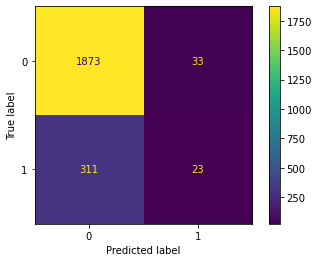

In [98]:
metrics.plot_confusion_matrix(logreg,X_all,Y)

In [99]:
print("Accuracy from Decision Tree Model",metrics.accuracy_score(y_test,y_pred_tree))
print("Precision from Decision Tree Model",metrics.precision_score(y_test,y_pred_tree))
print("Recall from Decision Tree Model",metrics.recall_score(y_test,y_pred_tree))
print("F1_Score from Decision Tree Model",metrics.f1_score(y_test,y_pred_tree))
print("Area under the ROC Curve from Decision Tree Model",metrics.roc_auc_score(y_test,y_pred_tree))

Accuracy from Decision Tree Model 0.8370535714285714
Precision from Decision Tree Model 0.4
Recall from Decision Tree Model 0.21212121212121213
F1_Score from Decision Tree Model 0.2772277227722772
Area under the ROC Curve from Decision Tree Model 0.5785736950658417


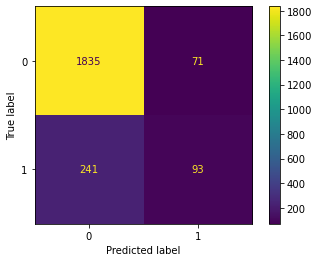

In [100]:
metrics.plot_confusion_matrix(dtree,X_all,Y)

In [101]:
print("Accuracy from Random Forest Model",metrics.accuracy_score(y_test,y_pred_rf))
print("Precision from Random Forest Model",metrics.precision_score(y_test,y_pred_rf))
print("Recall from Random Forest Model",metrics.recall_score(y_test,y_pred_rf))
print("F1_Score from Random Forest Model",metrics.f1_score(y_test,y_pred_rf))
print("Area under the ROC Curve from Random Forest Model",metrics.roc_auc_score(y_test,y_pred_rf))

Accuracy from Random Forest Model 0.8526785714285714
Precision from Random Forest Model 0.0
Recall from Random Forest Model 0.0
F1_Score from Random Forest Model 0.0
Area under the ROC Curve from Random Forest Model 0.5


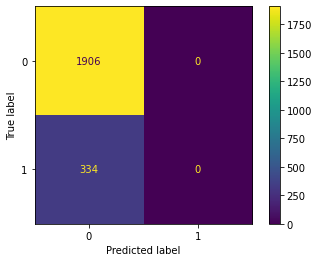

In [102]:
metrics.plot_confusion_matrix(rf,X_all,Y)

In [103]:
print("Accuracy from GBM Model",metrics.accuracy_score(y_test,y_pred_gbm))
print("Precision from GBM Model",metrics.precision_score(y_test,y_pred_gbm))
print("Recall from GBM Model",metrics.recall_score(y_test,y_pred_gbm))
print("F1_Score from GBM Model",metrics.f1_score(y_test,y_pred_gbm))
print("Area under the ROC Curve from GBM Model",metrics.roc_auc_score(y_test,y_pred_gbm))

Accuracy from GBM Model 0.8571428571428571
Precision from GBM Model 0.5263157894736842
Recall from GBM Model 0.30303030303030304
F1_Score from GBM Model 0.38461538461538464
Area under the ROC Curve from GBM Model 0.6279549420910677


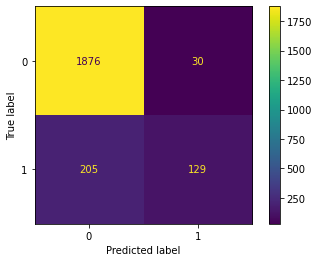

In [104]:
metrics.plot_confusion_matrix(gbm,X_all,Y)

# Extracting the importance feature from best model

In [105]:
import pandas as pd
feature_importances=pd.DataFrame(gbm.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances.shape

(45, 1)

# Extracting Top 10 features from the model

In [106]:
feature_importances.iloc[0:10]

,importance
Income,0.203555
AcceptedCmp3_1,0.201680
MntMeatProducts,0.199366
Cust_Tenure_9.0,0.072827
MntFishProducts,0.055813
MntFruits,0.040554
NumDealsPurchases_10,0.025441
NumCatalogPurchases_10,0.024639
Marital_Status_Single,0.024426
Marital_Status_Together,0.022773


# Plotting the top 10 features importances in a Horizontal Bar Plot

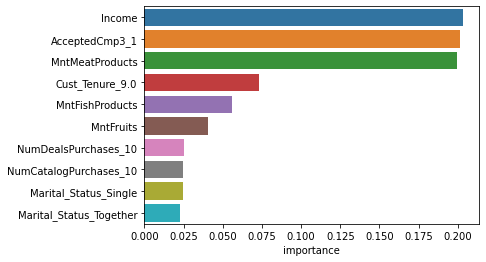

In [108]:
ax=sns.barplot(x='importance',y=feature_importances.iloc[0:10].index,data=feature_importances.iloc[0:10])

# Probability Decile Analysis and Gains Chart /Lorenz Curve

# Step 1: Getting the Model Probabilities

In [112]:
y_pred_prob=gbm.predict_proba(X_all)[:,1]
df['pred_prob']=pd.DataFrame(y_pred_prob)

# Step 2: Create Deciles based on the Model Probabilties

In [113]:
df['P_Rank_gbm']=pd.qcut(df['pred_prob'].rank(method='first').values,10,duplicates='drop').codes+1
df[['pred_prob','P_Rank_gbm']].head()

,pred_prob,P_Rank_gbm
0,0.592997,10
1,0.015751,1
2,0.072780,5
3,0.047694,3
4,0.062882,5


# Summarize the data at the Decile Level of Analysis

In [114]:
rank_df=df.groupby('P_Rank_gbm')['Response'].agg(['count','mean']).sort_values(by='P_Rank_gbm',ascending=False)
rank_df.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df

,count,Actual_event_rate
P_Rank_gbm,,
10,224,0.745536
9,224,0.312500
8,224,0.174107
7,224,0.098214
6,224,0.058036
5,224,0.022321
4,224,0.044643
3,224,0.017857
2,224,0.013393


# Step-4 Event Capture Analysis across Probability Deciles

In [115]:
rank_df['N_events']=rank_df['count']*rank_df['Actual_event_rate']
rank_df['cum_events']=rank_df['N_events'].cumsum()
rank_df['event_cap']=rank_df['N_events']/max(rank_df['N_events'].cumsum())
rank_df['cum_event_cap']=rank_df['event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap
P_Rank_gbm,,,,,,
10,224,0.745536,167.0,167.0,0.500000,0.500000
9,224,0.312500,70.0,237.0,0.209581,0.709581
8,224,0.174107,39.0,276.0,0.116766,0.826347
7,224,0.098214,22.0,298.0,0.065868,0.892216
6,224,0.058036,13.0,311.0,0.038922,0.931138
5,224,0.022321,5.0,316.0,0.014970,0.946108
4,224,0.044643,10.0,326.0,0.029940,0.976048
3,224,0.017857,4.0,330.0,0.011976,0.988024
2,224,0.013393,3.0,333.0,0.008982,0.997006


# Step-5 Non Event Capture Analysis across Probability Deciles

In [116]:
rank_df['N_non_events']=rank_df['count']-rank_df['N_events']
rank_df['cum_non_events']=rank_df['N_non_events'].cumsum()
rank_df['non_event_cap']=rank_df['N_non_events']/max(rank_df['N_non_events'].cumsum())
rank_df['cum_non_event_cap']=rank_df['non_event_cap'].cumsum()
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap
P_Rank_gbm,,,,,,,,,,
10,224,0.745536,167.0,167.0,0.500000,0.500000,57.0,57.0,0.029906,0.029906
9,224,0.312500,70.0,237.0,0.209581,0.709581,154.0,211.0,0.080797,0.110703
8,224,0.174107,39.0,276.0,0.116766,0.826347,185.0,396.0,0.097062,0.207765
7,224,0.098214,22.0,298.0,0.065868,0.892216,202.0,598.0,0.105981,0.313746
6,224,0.058036,13.0,311.0,0.038922,0.931138,211.0,809.0,0.110703,0.424449
5,224,0.022321,5.0,316.0,0.014970,0.946108,219.0,1028.0,0.114900,0.539349
4,224,0.044643,10.0,326.0,0.029940,0.976048,214.0,1242.0,0.112277,0.651626
3,224,0.017857,4.0,330.0,0.011976,0.988024,220.0,1462.0,0.115425,0.767051
2,224,0.013393,3.0,333.0,0.008982,0.997006,221.0,1683.0,0.115950,0.883001


# Step-6: Compute KS Statistic and Lift over Baseline Event Rate

In [117]:
rank_df['KS']=round((rank_df['cum_event_cap']-rank_df['cum_non_event_cap']),4)
rank_df['Baseline_Event_Rate']=(max(rank_df['cum_events'])/max(rank_df['count'].cumsum()))
rank_df['Lift_over_Avg']=rank_df['Actual_event_rate']/rank_df['Baseline_Event_Rate']
rank_df

,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg
P_Rank_gbm,,,,,,,,,,,,,
10,224,0.745536,167.0,167.0,0.500000,0.500000,57.0,57.0,0.029906,0.029906,0.4701,0.149107,5.000000
9,224,0.312500,70.0,237.0,0.209581,0.709581,154.0,211.0,0.080797,0.110703,0.5989,0.149107,2.095808
8,224,0.174107,39.0,276.0,0.116766,0.826347,185.0,396.0,0.097062,0.207765,0.6186,0.149107,1.167665
7,224,0.098214,22.0,298.0,0.065868,0.892216,202.0,598.0,0.105981,0.313746,0.5785,0.149107,0.658683
6,224,0.058036,13.0,311.0,0.038922,0.931138,211.0,809.0,0.110703,0.424449,0.5067,0.149107,0.389222
5,224,0.022321,5.0,316.0,0.014970,0.946108,219.0,1028.0,0.114900,0.539349,0.4068,0.149107,0.149701
4,224,0.044643,10.0,326.0,0.029940,0.976048,214.0,1242.0,0.112277,0.651626,0.3244,0.149107,0.299401
3,224,0.017857,4.0,330.0,0.011976,0.988024,220.0,1462.0,0.115425,0.767051,0.2210,0.149107,0.119760
2,224,0.013393,3.0,333.0,0.008982,0.997006,221.0,1683.0,0.115950,0.883001,0.1140,0.149107,0.089820


# Step-7:Create Deciles(1-10) column to indicate the Decile number

In [118]:
rank_df=rank_df.reset_index()
rank_df['Decile']=rank_df.index+1
rank_df

,P_Rank_gbm,count,Actual_event_rate,N_events,cum_events,event_cap,cum_event_cap,N_non_events,cum_non_events,non_event_cap,cum_non_event_cap,KS,Baseline_Event_Rate,Lift_over_Avg,Decile
0,10,224,0.745536,167.0,167.0,0.500000,0.500000,57.0,57.0,0.029906,0.029906,0.4701,0.149107,5.000000,1
1,9,224,0.312500,70.0,237.0,0.209581,0.709581,154.0,211.0,0.080797,0.110703,0.5989,0.149107,2.095808,2
2,8,224,0.174107,39.0,276.0,0.116766,0.826347,185.0,396.0,0.097062,0.207765,0.6186,0.149107,1.167665,3
3,7,224,0.098214,22.0,298.0,0.065868,0.892216,202.0,598.0,0.105981,0.313746,0.5785,0.149107,0.658683,4
4,6,224,0.058036,13.0,311.0,0.038922,0.931138,211.0,809.0,0.110703,0.424449,0.5067,0.149107,0.389222,5
5,5,224,0.022321,5.0,316.0,0.014970,0.946108,219.0,1028.0,0.114900,0.539349,0.4068,0.149107,0.149701,6
6,4,224,0.044643,10.0,326.0,0.029940,0.976048,214.0,1242.0,0.112277,0.651626,0.3244,0.149107,0.299401,7
7,3,224,0.017857,4.0,330.0,0.011976,0.988024,220.0,1462.0,0.115425,0.767051,0.2210,0.149107,0.119760,8
8,2,224,0.013393,3.0,333.0,0.008982,0.997006,221.0,1683.0,0.115950,0.883001,0.1140,0.149107,0.089820,9
9,1,224,0.004464,1.0,334.0,0.002994,1.000000,223.0,1906.0,0.116999,1.000000,-0.0000,0.149107,0.029940,10


# Visualizing the performance of Model Probabilities across Deciles

# Step 8-Create the Rank Ordering Chart

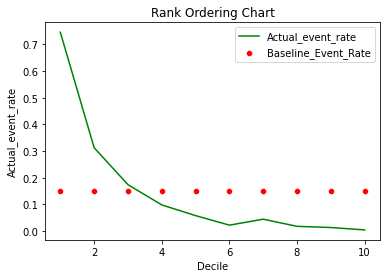

In [119]:
ax=sns.lineplot(x='Decile',y='Actual_event_rate',data=rank_df,color='green').set_title('Rank Ordering Chart')
ax=sns.scatterplot(x='Decile',y='Baseline_Event_Rate',data=rank_df,color='red')
ax.legend(['Actual_event_rate','Baseline_Event_Rate'])

# Step-9:Create the Lift Chart

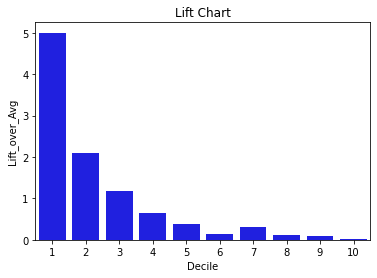

In [120]:
ax=sns.barplot(x='Decile',y='Lift_over_Avg',data=rank_df,color='blue').set_title('Lift Chart')

# Step-10:Create the Gains Chart /Lorenz Curve

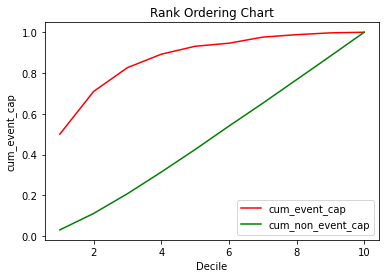

In [121]:
ax=sns.lineplot(x='Decile',y='cum_event_cap',data=rank_df,color='red').set_title('Rank Ordering Chart')
ax=sns.lineplot(x='Decile',y='cum_non_event_cap',data=rank_df,color='green')
ax.legend(['cum_event_cap','cum_non_event_cap'])

# Model able to maximise Events/Non-Event Discrimination by the Top 3 deciles?

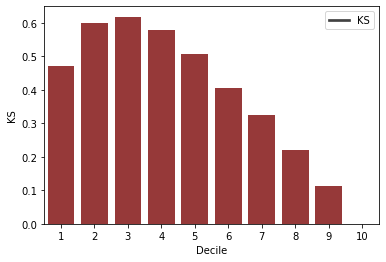

In [122]:
ax=sns.barplot(x='Decile',y='KS',data=rank_df,color='brown')
ax.legend(['KS'])

# Utilize APT framework to build Strategy

In [125]:
#Audience(Who we need to target?)
df['Predicted_Resp_Rank']=np.where(df['P_Rank_gbm']>=8,'Top3','Bottom 7')
df['Predicted_Resp_Rank'].value_counts()

Bottom 7    1568
Top3         672
Name: Predicted_Resp_Rank, dtype: int64

In [127]:
df_top3=df.loc[df['Predicted_Resp_Rank']=='Top3',:]
df_top3.shape

(672, 31)

In [128]:
#Prioritization(Based on Business Value and Customer Engagement)
df_top3['spend_cnt']=np.count_nonzero(df_top3[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']],axis=1)
df_top3['spend_cnt'].describe()

count    672.000000
mean       5.630952
std        0.741043
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        6.000000
Name: spend_cnt, dtype: float64

In [129]:
df_top3['Engagement']=np.where(df_top3['spend_cnt']<df_top3['spend_cnt'].quantile(0.75),"Low","High")
df_top3['Engagement'].value_counts()

High    502
Low     170
Name: Engagement, dtype: int64

In [130]:
df_top3['Total_Spend']=df_top3['MntWines']+df_top3['MntFruits']+df_top3['MntMeatProducts']+df_top3['MntFishProducts']+df_top3['MntSweetProducts']+df_top3['MntGoldProds']
df_top3['Total_Spend'].describe()

count     672.000000
mean      998.892857
std       689.103357
min         8.000000
25%       298.250000
50%      1092.500000
75%      1572.250000
max      2525.000000
Name: Total_Spend, dtype: float64

In [131]:
df_top3['spend_level']=np.where(df_top3['Total_Spend']<df_top3['Total_Spend'].quantile(0.75),"Low Spend","High Spend")
df_top3['spend_level'].value_counts()

Low Spend     504
High Spend    168
Name: spend_level, dtype: int64

In [132]:
pd.crosstab(index=df_top3['spend_level'], columns=df_top3['Engagement'],values=df_top3['Response'],aggfunc='mean')

Engagement,High,Low
spend_level,,
High Spend,0.493151,0.500000
Low Spend,0.401685,0.337838


In [133]:
pd.crosstab(index=df_top3['spend_level'], columns=df_top3['Engagement'],values=df_top3['Response'],aggfunc='count')

Engagement,High,Low
spend_level,,
High Spend,146,22
Low Spend,356,148


In [134]:
df_priority_1=df_top3.loc[(df_top3['spend_level']=='High Spend') & (df_top3['Engagement']=='Low'),:]
df_priority_1.shape

(22, 35)

In [136]:
df_priority_2=df_top3.loc[(df_top3['spend_level']=='High Spend') & (df_top3['Engagement']=='High'),:]
df_priority_2.shape

(146, 35)

In [137]:
df_priority_3=df_top3.loc[(df_top3['spend_level']=='Low Spend') & (df_top3['Engagement']=='High'),:]
df_priority_3.shape

(356, 35)

In [138]:
df_priority_4=df_top3.loc[(df_top3['spend_level']=='Low Spend') & (df_top3['Engagement']=='Low'),:]
df_priority_4.shape

(148, 35)

In [139]:
#Treatment
spend_cat_priority1=df_priority_1[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [140]:
spend_avg = spend_cat_priority1.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            1001.681818
MntMeatProducts      680.727273
MntGoldProds          68.954545
MntFruits             67.227273
MntFishProducts       49.636364
MntSweetProducts      17.318182
dtype: float64

In [141]:
spend_cat_priority2=df_priority_2[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [142]:
spend_avg = spend_cat_priority2.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            858.842466
MntMeatProducts     665.856164
MntFishProducts     107.849315
MntGoldProds         85.678082
MntSweetProducts     76.664384
MntFruits            76.369863
dtype: float64

In [143]:
spend_cat_priority3=df_priority_3[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [144]:
spend_avg = spend_cat_priority3.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            326.946629
MntMeatProducts     225.314607
MntGoldProds         61.634831
MntFishProducts      49.219101
MntSweetProducts     38.828652
MntFruits            36.457865
dtype: float64

In [145]:
spend_cat_priority4=df_priority_4[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']]

In [146]:
spend_avg = spend_cat_priority4.mean(axis=0).sort_values(ascending=False)
spend_avg

MntWines            393.729730
MntMeatProducts     150.966216
MntGoldProds         49.121622
MntFishProducts      17.040541
MntSweetProducts     11.817568
MntFruits            10.425676
dtype: float64

# Project Report 